<a href="https://colab.research.google.com/github/amir-jafari/SOM/blob/main/examples/Tabular/Iris/Iris_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will see the basics of how to use NNSOM with Iris dataset.

In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    # Install NNSOM
    !pip install --upgrade NNSOM

In [ ]:
from NNSOM.plots import SOMPlots
from NNSOM.utils import *

Set the parameters used for NNSOM

In [ ]:
# SOM Parameters
SOM_Row_Num = 4  # The number of row used for the SOM grid.
Dimensions = (SOM_Row_Num, SOM_Row_Num) # The dimensions of the SOM grid.

# Training Parameters
Epochs = 500
Steps = 100
Init_neighborhood = 3

# Random State
from numpy.random import default_rng
SEED = 1234567
rng = default_rng(SEED)

NNSOM relies on the Python ecosystem to import and preprocess the data. For this example we will load the Iris dataset dataset using numpy and pandas:

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
X = iris.data
y = iris.target

# Preprocessing data
X = X[rng.permutation(len(X))]
y = y[rng.permutation(len(X))]

scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
X = np.transpose(X)

Training SOM. We will use SOMPlots which is child class of SOM because we want to plot SOM.

In [ ]:
som = SOMPlots(Dimensions)
som.init_w(X)
som.train(X, Init_neighborhood, Epochs, Steps)

Beginning Initialization
Current Time = 16:56:10
Ending Initialization
Current Time = 16:56:10
Beginning Training
Current Time = 16:56:10
50
Current Time = 16:56:10
100
Current Time = 16:56:10
150
Current Time = 16:56:10
200
Current Time = 16:56:10
250
Current Time = 16:56:10
300
Current Time = 16:56:10
350
Current Time = 16:56:10
400
Current Time = 16:56:10
450
Current Time = 16:56:10
500
Current Time = 16:56:10
Ending Training
Current Time = 16:56:10


Save the trained model

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')

abs_path = "/content/drive/MyDrive/Colab Notebooks/NNSOM/Examples/Iris" + os.sep

Trained_SOM_File = "SOM_Model_iris_Epoch_" + str(Epochs) + '_Seed_'  + str(SEED) + '_Size_' + str(SOM_Row_Num) + '.pkl'

som.save_pickle(Trained_SOM_File, abs_path)

Mounted at /content/drive


Error Analysis

In [ ]:
# Find quantization error
quant_err = som.quantization_error()
print('Quantization error: ' + str(quant_err))

Quantization error: 0.23404410846106943


In [ ]:
# Find topological error
top_error_1, top_error_1_2 =  som.topological_error(X)
print('Topological Error (1st neighbor) = ' + str(top_error_1) + '%')
print('Topological Error (1st and 2nd neighbor) = ' + str(top_error_1_2) + '%')

Topological Error (1st neighbor) = 18.0%
Topological Error (1st and 2nd neighbor) = 0.0%


In [ ]:
# Find Distortion Error
som.distortion_error(X)

Distortion (d=1) = 1.436925118288544
Distortion (d=2) = 2.142737184763322
Distortion (d=3) = 2.0139120746735784


Visualize the SOM

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

SOM Topology

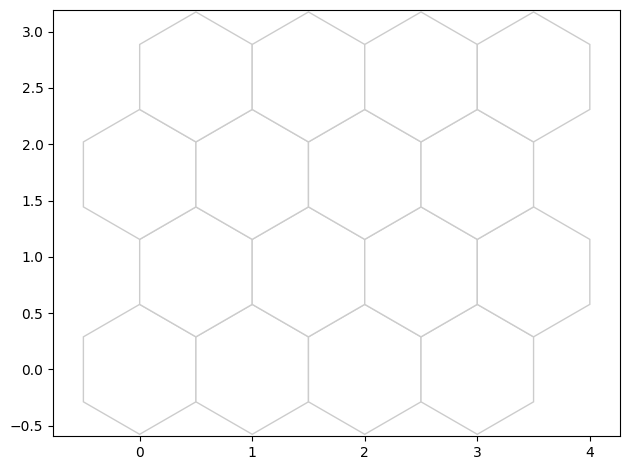

In [ ]:
fig, ax, patches = som.plt_top()
plt.show()

SOM Topology with neuron number

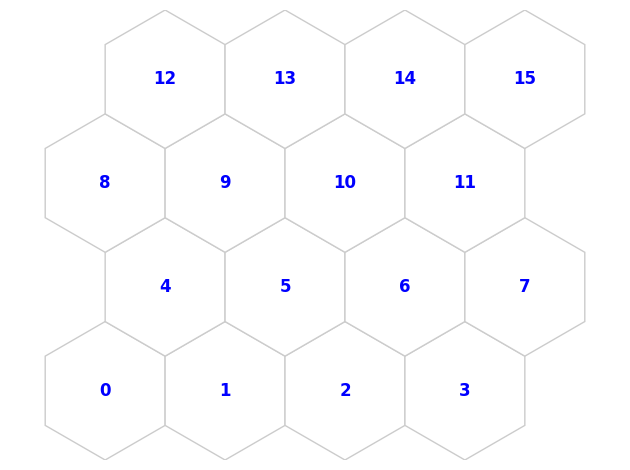

In [ ]:
fig, ax, pathces, text = som.plt_top_num()
plt.show()

Hit Histogram

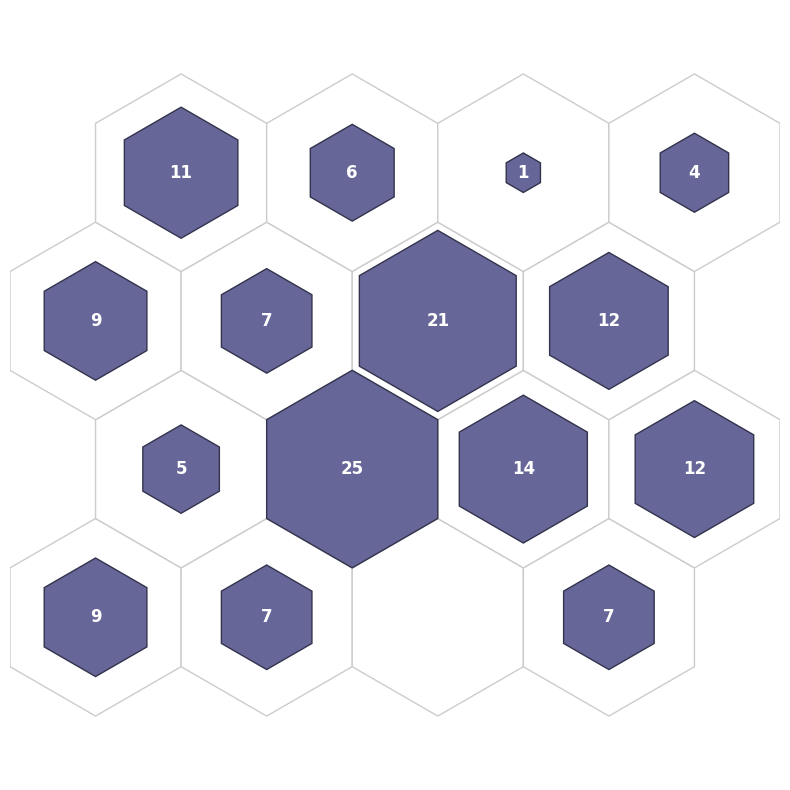

In [ ]:
fig, ax, patches, text = som.hit_hist(X, True)
plt.show()

Neighborhood Connection Map

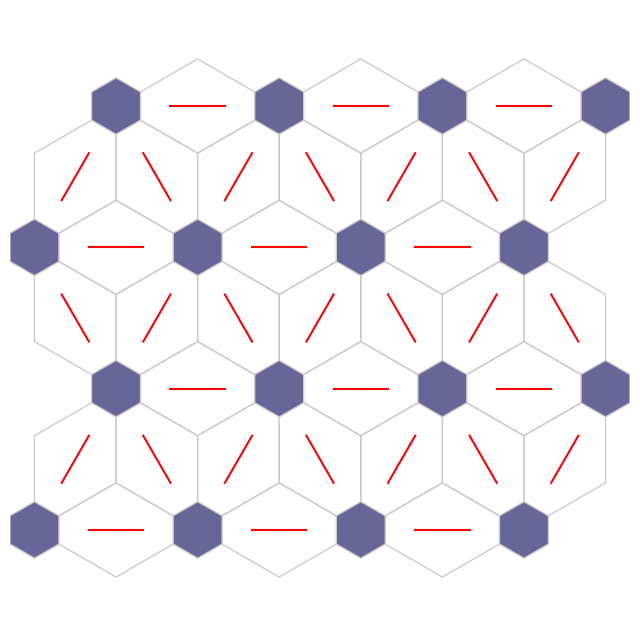

In [ ]:
fig, ax, patches = som.plt_nc()
plt.show()

Distance map

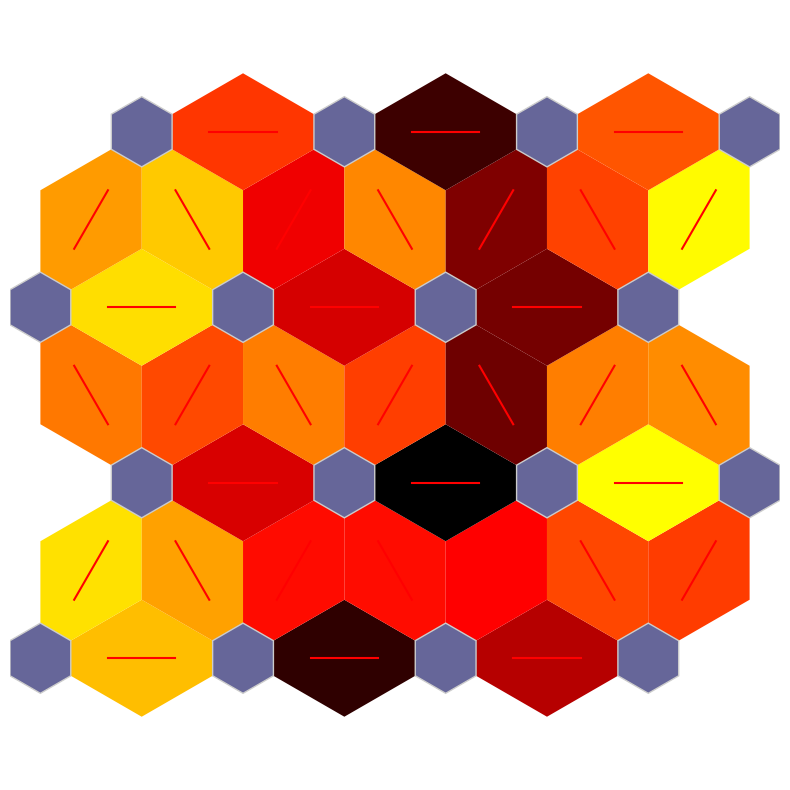

In [ ]:
fig, ax, patches = som.neuron_dist_plot()
plt.show()

Weight Position Plot

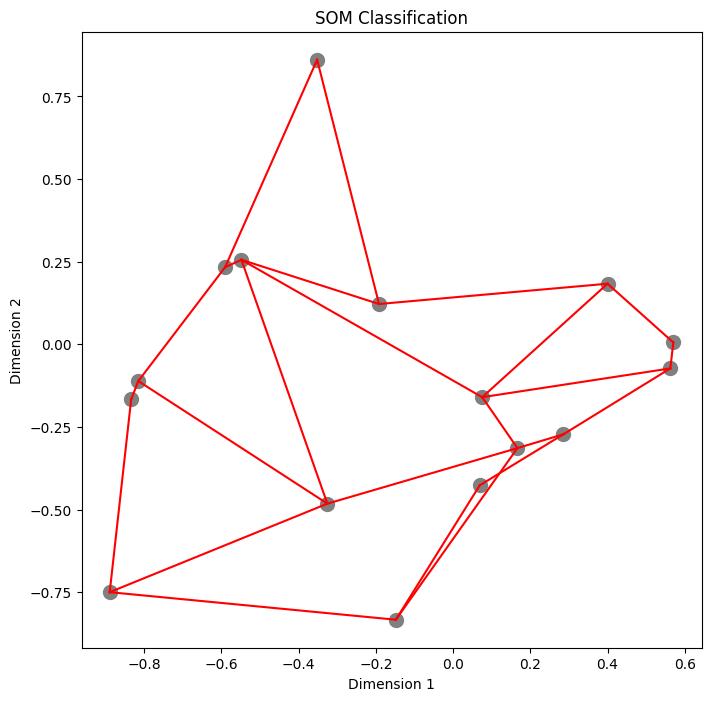

In [ ]:
som.plt_pos(inputs=None)

Weight as line plot

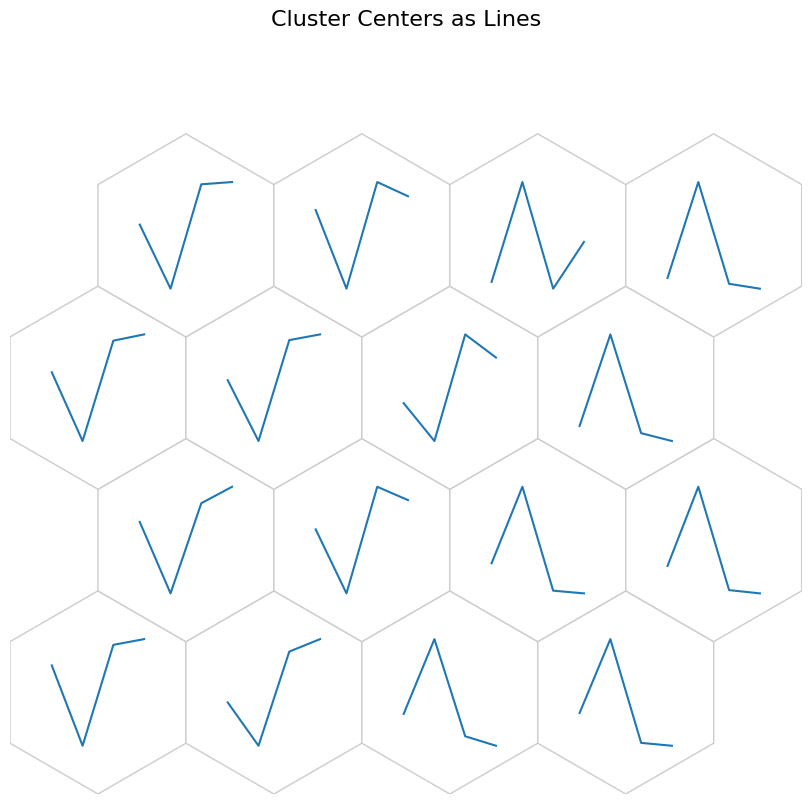

In [ ]:
fig, ax, h_axes = som.multiplot('wgts')
plt.show()